In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [2]:
df = pd.read_csv('../datasets/height_weight/height_weight.csv')
# Since height is in pound and weight is in inch.
# We're doing a bit conversion here
df.loc[:,'Height'] *= 0.0254
df.loc[:,'Weight'] *= 0.45359237

In [3]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']
display(df_male)
display(df_female)

,Gender,Height,Weight
0,Male,1.875714,109.721075
1,Male,1.747060,73.622792
2,Male,1.882397,96.497629
3,Male,1.821967,99.809586
4,Male,1.774998,93.598695
...,...,...,...
4995,Male,1.749046,80.345294
4996,Male,1.751925,72.250564
4997,Male,1.702150,90.353514
4998,Male,1.817566,84.325502


,Gender,Height,Weight
5000,Female,1.496333,46.306486
5001,Female,1.656842,64.095243
5002,Female,1.609573,59.439380
5003,Female,1.637792,58.137620
5004,Female,1.569545,58.867856
...,...,...,...
9995,Female,1.680785,62.041210
9996,Female,1.703506,77.504378
9997,Female,1.622247,58.275424
9998,Female,1.753470,74.322226


Text(0, 0.5, 'Height (m)')

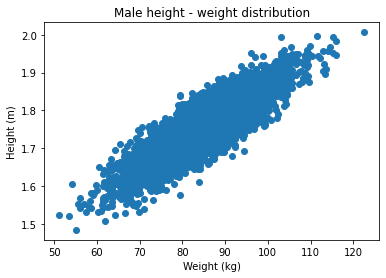

In [4]:
plt.scatter(df_male['Weight'], df_male['Height'])
plt.title("Male height - weight distribution")
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)')

Text(0, 0.5, 'Height (m)')

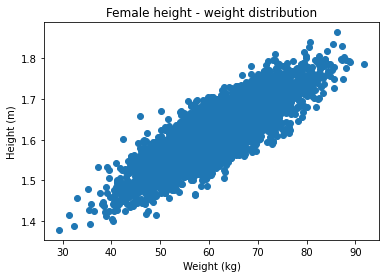

In [5]:
plt.scatter(df_female['Weight'], df_female['Height'])
plt.title("Female height - weight distribution")
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)')

#### Predicting on male data set
##### from height predict weight

In [6]:
df_male_train = df_male[:4000]
df_male_test = df_male[4000:]
data_train = np.array(df_male_train['Height'])
label_train = np.array(df_male_train['Weight'])

In [7]:
data_train.shape

(4000,)

In [8]:
data_train_normalizer = BatchNormalization(axis=1)


In [70]:

model = Sequential([
        data_train_normalizer,
        Dense(units=1)
])


In [71]:
#predict with untrained model
model.predict(data_train[:10])

array([[9.23432  ],
       [7.7901287],
       [9.309334 ],
       [8.630984 ],
       [8.103734 ],
       [7.3542013],
       [7.7910337],
       [7.666558 ],
       [7.287465 ],
       [6.2717166]], dtype=float32)

In [72]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

In [87]:
#training model
fit_log = model.fit(data_train, label_train, epochs=10, verbose=1, validation_split=0.2)

Train on 3200 samples, validate on 800 samples
Epoch 1/10
3200/3200 [==============================] - 0s 44us/sample - loss: 25.0610 - val_loss: 24.7279
Epoch 2/10
3200/3200 [==============================] - 0s 42us/sample - loss: 25.3184 - val_loss: 20.4329
Epoch 3/10
3200/3200 [==============================] - 0s 43us/sample - loss: 24.7347 - val_loss: 23.0875
Epoch 4/10
3200/3200 [==============================] - 0s 38us/sample - loss: 25.6222 - val_loss: 22.3702
Epoch 5/10
3200/3200 [==============================] - 0s 39us/sample - loss: 24.0980 - val_loss: 21.1567
Epoch 6/10
3200/3200 [==============================] - 0s 42us/sample - loss: 25.7375 - val_loss: 20.8622
Epoch 7/10
3200/3200 [==============================] - 0s 41us/sample - loss: 24.8483 - val_loss: 28.8362
Epoch 8/10
3200/3200 [==============================] - 0s 38us/sample - loss: 25.7107 - val_loss: 21.9345
Epoch 9/10
3200/3200 [==============================] - 0s 41us/sample - loss: 23.9368 - val_loss

##### Using only one node doesn't seem to result in good prediction

Text(0.5, 1.0, 'Loss')

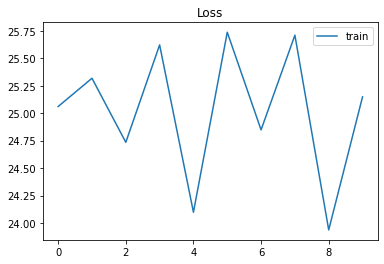

In [88]:
plt.plot(fit_log.history['loss'], label = 'train')
plt.legend()
plt.title('Loss')

In [36]:
pred = model.predict(data_train)#height predicted
pred[:10]

array([[89.46158 ],
       [84.88045 ],
       [89.69953 ],
       [87.54773 ],
       [85.87524 ],
       [83.49764 ],
       [84.88332 ],
       [84.488464],
       [83.28594 ],
       [80.06388 ]], dtype=float32)

In [37]:
df_male_train['Height'][:10]

0    1.875714
1    1.747060
2    1.882397
3    1.821967
4    1.774998
5    1.708227
6    1.747141
7    1.736052
8    1.702281
9    1.611795
Name: Height, dtype: float64

### Manually adjust weights



In [123]:
#showing all layers
for i in model.layers:
    print(i.name)
    wieghts = i.get_weights()
    print(wieghts)

#

batch_normalization
[array([-1.4722991], dtype=float32), array([-12.689026], dtype=float32), array([1.7531141], dtype=float32), array([0.00514765], dtype=float32)]
dense_2
[array([[-5.733123]], dtype=float32), array([12.469263], dtype=float32)]


In [119]:
# weight, bias
print(wieghts)

[array([[-5.733123]], dtype=float32), array([12.469263], dtype=float32)]


In [136]:
# Adjusting dense layer
wieghts[0][0][0] = -5.7
wieghts[1][0] = 12.469263
wieghts

[array([[-5.7]], dtype=float32), array([12.469263], dtype=float32)]

In [137]:
model.get_layer('dense_2').set_weights(wieghts)

#train again
fit_log = model.fit(data_train, label_train, epochs=10, verbose=1, validation_split=0.2)

In [143]:
for i in model.layers:
    print(i.name)
    wieghts = i.get_weights()
    print(wieghts)

batch_normalization
[array([-1.1932904], dtype=float32), array([-10.34847], dtype=float32), array([1.753386], dtype=float32), array([0.00509784], dtype=float32)]
dense_2
[array([[-6.6692405]], dtype=float32), array([14.966672], dtype=float32)]


#### Adjusting weight manually in this case doesn't seem to help